# Neural Network from Scratch


## Import libraries

We will be using the lower resolution MINST data set

In [2]:
from sklearn.datasets import load_digits # The MNIST data set is in scikit learn data set
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
import numpy as np
import numpy.random as r # We will randomly initialize our weights
import matplotlib.pyplot as plt 

## Looking at the data

After we load the data, we print the shape of the data and a pixelated digit.

We also show what the features of one example looks like.

The neural net will learn to estimate which digit these pixels represent.

The shape of the digits dataset:
(1797, 64)


<Figure size 432x288 with 0 Axes>

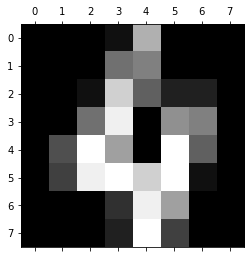

[0 1 2 ... 8 9 8]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [3]:
# load all the digits (img)
digits = load_digits()
# load the data from the digit (img)

print("The shape of the digits dataset:") 
print(digits.data.shape)
# plot the digits
# using .gray()

# and .matshow() with argument digit.images[xx]

# plt.show()
plt.gray() 
plt.matshow(digits.images[4]) 
plt.show()
# get the gt for this digit img
y=digits.target
X=digits.data
print(y)
print(X)

## 1) Scale the dataset
The training features range from 0 to 15.  To help the algorithm converge, we will scale the data to have a mean of 0 and unit variance

In [4]:
# use the stander lib to scale the data
scale=StandardScaler()
# init the scaler 

# fit the data to the scaler 
X=scale.fit_transform(X)

# Looking the new features after scaling
print(X)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


## 2) Creating training and test datasets
We split the data into training and test data sets. We will train the neural network with the training dataset, and evaluate our neural network with the test dataset 

In [5]:
#Split the data into training and test set.  60% training and %40 test
# split=int(len(X)*0.4)
# print(len(X))
# print(split)
# X_train=X[:len(X)-split]
# X_test=X[len(X)-split:]
# y_train=y[:len(X)-split]
# y_test=y[len(X)-split:]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6,test_size = 0.4)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
# print(vector)

(1078, 64)
(719, 64)
(1078,)
(719,)


## 3) Setting up the output layer

### One hot encoding

In [6]:
def convert_y_to_vect(y):
#     Our target is an integer in the range [0,..,9], so we will have 10 output neuron's in our network.  

#     If  y=0 we want the output neurons to have the values (1,0,0,0,0,0,0,0,0,0)
#     If  y=1 we want the output neurons to have the values (0,1,0,0,0,0,0,0,0,0)
#     etc

#     Thus we need to change our target so it is the same as our hoped for output of the neural network. 

#     If y=0$we change it into the vector (1,0,0,0,0,0,0,0,0,0)
#     If y=1 we change it into the vector (0,1,0,0,0,0,0,0,0,0)
#     etc

#     The code to covert the target vector.
    vector=np.zeros((len(y),10), dtype=float)
    count=0
    for i in y:
        idx=i
        vector[count][idx]=1
        count=count+1
    return vector

Converting the training and test targets to vectors 

In [7]:
# convert digits to vectors using the func above
y_v_train=convert_y_to_vect(y_train)
y_v_test=convert_y_to_vect(y_test)
# appky this to both train and test splits


A quick check to see that our code performs as we expect 

In [8]:
print(y_train[0:4])
print(y_v_train[0:4])

[6 7 1 1]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## 4) Creating the neural network

### The activation function and its derivative

In [9]:
# We will use the sigmoid activation function:  f(z)={1}/{1+e^{-z}}
def f(z):
    return 1/(1+np.exp(-z))

# The deriviative of the sigmoid function is: $f'(z) = f(z)(1-f(z))$ 
def f_deriv(z):
    fz=f(z)
    return fz*(1-fz)

In [10]:
def relu(z):
    return np.maximum(0,z)
def relu_deriv(z):
    return(z>0).astype(int)

In [11]:
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
def tanh_deriv(z):
    return 1-tanh(z)**2

### Creating and initialing W and b


In [12]:
def setup_and_init_weights(nn_structure):
    # The weights in W are different so that during back propagation the nodes on a level will have different gradients and thus have different update values.
    
    #creating a dictionary for wiehgts i.e. a set of key: value pairs
    weights={}
    #creating a dictionary for bias i.e. a set of key: value pairs
    bias={}

        # We want the weights to be small values, since the sigmoid is almost "flat" for large inputs.
        # Next is the code that assigns each weight a number uniformly drawn from $[0.0, 1.0)$.  
        # The code assumes that the number of neurons in each level is in the python list *nn_structure*.
        # .random_sample return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
    weights[1]=r.random_sample((nn_structure[1], nn_structure[0]))
    weights[2]=r.random_sample((nn_structure[2], nn_structure[1]))

    bias[1]=r.random_sample((nn_structure[1],))
    bias[2]=r.random_sample((nn_structure[2],))

    return weights,bias

nn_structure = [64, 30, 10]
weights,bias=setup_and_init_weights(nn_structure)
print(bias[2].shape)

(10,)


### Initializing $\triangledown W$ and $\triangledown b$


In [13]:
def init_tri_values(nn_structure):
    # Creating dlt_W and dlt_b to have the same size as W and b,and init the dlt_W, and dlt_b to 0
    dlt_W={}
    dlt_b={}
    
    dlt_W[1]=np.zeros((nn_structure[1], nn_structure[0]))
    dlt_W[2]=np.zeros((nn_structure[2], nn_structure[1]))

    dlt_b[1]=np.zeros((nn_structure[1],))
    dlt_b[2]=np.zeros((nn_structure[2],))
    
    # use for loop to init the dlt W and dlt b
    
        # you can use np.zeros
    return dlt_W,dlt_b

## Feed forward
Perform a forward pass throught the network.  The function returns the values of $a$ and $z$

In [14]:
def feed_forward(x, weights, bias):
    # create a dictionary for holding the a values for all levels
    a_values={}
    # create a dictionary for holding the z values for all the layers
    z_values={}
    # for each layer
    for i in range(1,len(nn_structure)): 
        a_values[1]=x
        # z^(l+1) = W^(l)*a^(l) + b^(l)
        z_values[i]=np.dot(weights[i],a_values[i])+bias[i]
        # a^(l+1) = f(z^(l+1))
        a_values[i+1]=f(z_values[i])

    return a_values,z_values



## Compute $\delta$
compute $\delta^{(s_l)}$ in a function called "calculate_out_layer_delta",  and  computes $\delta^{(\ell)}$ for the hidden layers in the function called "calculate_hidden_delta".  



In [15]:
def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    delta_nl=-(y-a_out)*f_deriv(z_out)
    return delta_nl


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    delta_l=w_l.T*delta_plus_1*f_deriv(z_l)
    return delta_l

In [16]:
def evaluate_error(y,a_values):
    MSE=np.square(np.subtract(y,a_values)).mean()
    return MSE

## The Back Propagation Algorithm


In [17]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    # init W and b
    weights, bias = setup_and_init_weights(nn_structure)
    # init counter to 0
    counter=0
    # store the length of data
    length=X.shape[0]
    # init a list to store the all costs
    cost_list=[]
    print('Starting gradient descent for {} iterations'.format(iter_num))
    # while the counter is less than the max iterations:
    while counter<iter_num:
        # print the iteration number for every 1000 iter
        if counter % 100 == 0 :
            print("iteration number", counter)
        
        # init delt_W and delt_b
        delt_W,delt_b=init_tri_values(nn_structure)
        # init the cost to 0
        cost=0
        # for each data:
        for i in range(length):
            new_weights={}
            data_x=X[i]
            data_y=y[i]
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a_values,z_values=feed_forward(data_x, weights, bias)
            # loop from nl-1 to 1 backpropagating the errors
#         print(avg_cost)
            for j in range(len(nn_structure)-1, 1, -1):
                new_weights[len(nn_structure)] = calculate_out_layer_delta(data_y,a_values[len(nn_structure)],z_values[len(nn_structure)-1]) 
                new_weights[j] = calculate_hidden_delta(new_weights[j+1], weights[j], z_values[j])
#                 print(a_values[len(nn_zaazaastructure)])
                cost=cost+evaluate_error(data_y,a_values[len(nn_structure)])
                delt_W[j] =delt_W[j]+ np.matmul(new_weights[j+1][:,np.newaxis],np.transpose(a_values[j][:,np.newaxis]))
                # tri_W[l] =tri_W[l]+ np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))
                # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                # hit: you can use np.newaxis to increase the number of dimensions
                        
                # trib^(l) = trib^(l) + delta^(l+1)  
                delt_b[j] = delt_b[j]+new_weights[j+1]
        # perform the gradient descent step for the weights in each layer
        
        for k in range(1,len(nn_structure)):
            weights[k] =weights[k]- (alpha*delt_W[k]/length)
            bias[k] = bias[k]- (alpha*delt_b[k]/length)
        
        # complete the average cost (mean squared error) calculation
        cost=cost/length
        # append the cost to the cost list
        cost_list.append(cost)
        # increase the counter 
        counter=counter+1
    return weights,bias,cost_list

In [18]:

def predict_y(W, b, X, n_layers):
    length = X.shape[0]
    predictions_list=[]
    for i in range(length):
        a_values, z_values = feed_forward(X[i], W, b)
        prediction = np.argmax(a_values[n_layers])
        predictions_list.append(prediction)
    return predictions_list

## Running the neural network

Our code assumes the size of each layer in our network is held in a list.  The input layer will have 64 neurons (one for each pixel in our 8 by 8 pixelated digit).  Our hidden layer has 30 neurons (you can change this value).  The output layer has 10 neurons.

Next we create the python list to hold the number of neurons for each level and then run the neural network code with our training data.

This code will take some time...

In [19]:
nn_structure = [64, 30, 10]

# train the NN with the nn_structure and 3000 iterations
W, b, costList = train_nn(nn_structure, X_train,y_v_train, 3000,0.25)


Starting gradient descent for 3000 iterations
iteration number 0
iteration number 100
iteration number 200
iteration number 300
iteration number 400
iteration number 500
iteration number 600
iteration number 700
iteration number 800
iteration number 900
iteration number 1000
iteration number 1100
iteration number 1200
iteration number 1300
iteration number 1400
iteration number 1500
iteration number 1600
iteration number 1700
iteration number 1800
iteration number 1900
iteration number 2000
iteration number 2100
iteration number 2200
iteration number 2300
iteration number 2400
iteration number 2500
iteration number 2600
iteration number 2700
iteration number 2800
iteration number 2900


### Plotting the learning curve


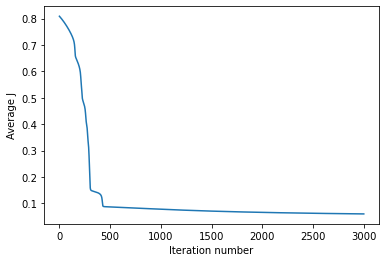

In [20]:

plt.plot(costList)
# x label: "Iteration number"
plt.xlabel("Iteration number")
# y label: "Average J"
plt.ylabel("Average J")
plt.show()

## 5) Assessing accuracy
Next we determine what percentage the neural network correctly predicted the handwritten digit correctly on the test set

In [21]:
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

Prediction accuracy is 67.17663421418636%
